In [9]:
# Adrian Kokoszka 19727
# importowanie potrzebnych bibliotek
import tensorflow as tf #biblioteka tensorflow, aby móc korzystać z funkcji związanych z uczeniem maszynowym
import numpy as np #biblioteka numpy, aby móc korzystać z funkcji związanych z obliczeniami numerycznymi
import matplotlib.pyplot as plt #biblioteka matplotlib, aby móc korzystać z funkcji związanych z rysowaniem wykresów
from mpl_toolkits.mplot3d import Axes3D #biblioteka do rysowania wykresów 3D
print(tf.__version__) #sprawdzenie wersji biblioteki tensorflow


2.11.0


In [10]:
observations=1000 #ilość obserwacji
xs = np.random.uniform(low=-10,high=10, size=(observations,1)) #losowanie wartości z zakresu od -10 do 10 i zapisanie ich do tablicy xs
xz = np.random.uniform(low=-10,high=10, size=(observations,1)) #losowanie wartości z zakresu od -10 do 10 i zapisanie ich do tablicy xz
inputs=np.column_stack((xs,xz)) #łączenie dwóch tablic w jedną
print(inputs.shape) #wypisanie rozmiaru tablicy, w tym przypadku 1000 wierszy i 2 kolumny

(1000, 2)


In [11]:
noise = np.random.uniform(low=-1,high=1, size=(observations,1)) # losowanie wartości szumu z zakresu od -1 do 1 i zapisanie ich do tablicy noise
targets = 2*xs - 3*xz + 5 + noise #funkcja liniowa, która ma być wyznaczona przez sieć neuronową 
np.savez('TF_dataset', inputs=inputs, targets=targets)# zapisanie danych do pliku .npz
print(targets.shape) # wypisanie rozmiaru tablicy, w tym przypadku 1000 wierszy i 1 kolumna

(1000, 1)


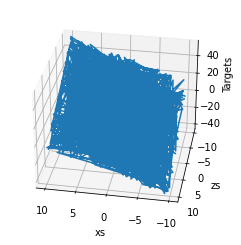

In [12]:
targets = targets.reshape(observations,) #zmiana rozmiaru tablicy targets bez zmiany jej zawartości
xs = xs.reshape(observations,) #zmiana rozmiaru tablicy xs bez zmiany jej zawartości
xz = xz.reshape(observations,) #zmiana rozmiaru tablicy xz bez zmiany jej zawartości
fig = plt.figure() #tworzenie wykresu
ax = fig.add_subplot(111, projection='3d') #wyswietlanie wykresu w trzech wymiarach
ax.plot(xs,xz,targets) #rysowanie wykresu
ax.set_xlabel('xs') #podpisanie osi x
ax.set_ylabel('zs') #podpisanie osi y
ax.set_zlabel('Targets') #podpisanie osi z
ax.view_init(azim=100) #zmiana kąta widzenia wykresu o 100 stopni
plt.show() #wyświetlenie wykresu

In [13]:
init_range = 0.1 #zakres losowania wartości początkowych
weights = np.random.uniform(low=-init_range,high=init_range, size=(2,1)) #losowanie wartości z rozkładu jednostajnego z zakresu od -0.1 do 0.1 i zapisanie ich do tablicy weights
biases = np.random.uniform(low=-init_range,high=init_range, size=1) #losowanie wartości z rozkładu jednostajnego z zakresu od -0.1 do 0.1 i zapisanie ich do tablicy biases
print(weights,biases)   #wypisanie wartości początkowych weights i biases

[[ 0.09338525]
 [-0.02231573]] [0.02637758]


In [14]:
targets = targets.reshape(observations,1) #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! przeksztalcic z powrotem 
eta = 0.02 #współczynnik uczenia sieci neuronowej 
for i in range (100): #pętla wykonująca się 100 razy 
    outputs = np.dot(inputs, weights) + biases #obliczenie wartości wyjściowej sieci neuronowej 
    deltas = outputs - targets #obliczenie wartości błędu sieci neuronowej 
    
    loss = np.sum(deltas ** 2)/2/observations #obliczenie wartości funkcji kosztu 
    print(loss) #wypisanie wartości funkcji kosztu     
    
    deltas_scaled = deltas/observations #obliczenie wartości błędu sieci neuronowej 
    weights = weights - eta * np.dot(inputs.T, deltas_scaled) #obliczenie nowych wartości weights, które są wykorzystywane w kolejnej iteracji pętli 
    biases = biases - eta * np.sum(deltas_scaled) #obliczenie nowych wartości biases, które są wykorzystywane w kolejnej iteracji pętli
    

242.4675398053102
27.845082403251673
12.674097636990364
11.175942953777533
10.664266835404094
10.2423489238053
9.842763025966532
9.459496974905223
9.09145341184673
8.737986055102729
8.398513256379971
8.072480455505273
7.759355496393595
7.458627342948971
7.16980519738191
6.892417693608011
6.626012127296022
6.3701537169609725
6.124424894378646
5.888424623101148
5.66176774395383
5.444084346444535
5.235019165059105
5.034230999457926
4.841392157627255
4.65618792107649
4.478316031208624
4.307486196025594
4.143419616363459
3.9858485308842027
3.834515779081604
3.6891743815879563
3.5495871370966823
3.415526235243039
3.2867728848111133
3.1631169566603083
3.044356640788594
2.930298116972827
2.820755238448616
2.7155492281135003
2.6145083867576044
2.517467812845649
2.424269133392921
2.3347602454960614
2.248795068096776
2.1662333035733936
2.0869402087711366
2.0107863750974486
1.9376475173234862
1.8674042707470722
1.7999419963861047
1.7351505938844625
1.6729243218250909
1.613161625156978
1.5557649694

In [15]:
print (weights, biases) #wypisanie wartości weights i biases po 100 iteracjach pętli

[[ 2.00616429]
 [-3.00008915]] [4.32787825]


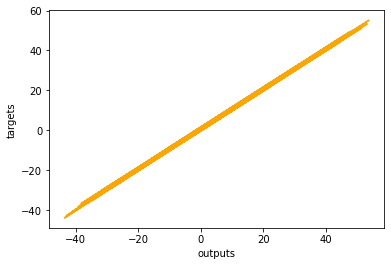

In [16]:
plt.plot(outputs, targets, color='orange') #rysowanie wykresu, gdzie osie x i y to outputs i targets
plt.xlabel('outputs') #podpisanie osi x
plt.ylabel('targets') #podpisanie osi y
plt.show() #wyświetlenie wykresu